# Data visualization for the BP addresses

See below for a Sankey chart showing the flow of transactions from the BP addresses.

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import altair as alt

In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
data_directory = '../jsonl/producerpay'
df = pd.DataFrame()
for data_file in [join(data_directory, f) for f in listdir(data_directory) if isfile(join(data_directory, f))]:
    df = pd.concat([df, pd.read_json(data_file, lines=True)])
df = df.sort_values('amount')

In [4]:
df

,account,date,timestamp,amount,token,from,to,block_num,transaction_id,memo,contract,action
78,eosio.vpay,2022-10-21 22:00:02,2022-10-21 22:00:02,127.0384,EOS,eosio.vpay,eosvenezuela,274426331,d2c797d49f359cb8943aff2d3cb4d27828239c0f4683d2...,producer vote pay,eosio.token,transfer
38,eosio.vpay,2022-10-26 07:12:18,2022-10-26 07:12:18,128.8207,EOS,eosio.vpay,eosbixinboot,275183402,1ff42206a8660656ee7daa91e8626d389583c345a4e37e...,producer vote pay,eosio.token,transfer
12,eosio.vpay,2022-10-26 02:00:02,2022-10-26 02:00:02,129.8141,EOS,eosio.vpay,eosvenezuela,275145939,75f5104a26a2abc888800acb1d97e936013a21f828b474...,producer vote pay,eosio.token,transfer
6,eosio.vpay,2022-10-25 01:00:06,2022-10-25 01:00:06,129.8710,EOS,eosio.vpay,eosvenezuela,274966054,5b8874b7813848f779009375d9704c570ef896e2ea9d37...,producer vote pay,eosio.token,transfer
38,eosio.vpay,2022-10-25 07:11:18,2022-10-25 07:11:18,129.9731,EOS,eosio.vpay,eosbixinboot,275010589,6867650895b973543b7f1e94dcaef1a7869db96d0c29ee...,producer vote pay,eosio.token,transfer
...,...,...,...,...,...,...,...,...,...,...,...,...
1,eosio.vpay,2022-10-21 00:03:31,2022-10-21 00:03:31,699.3684,EOS,eosio.vpay,newdex.bp,274268407,353555074901da28cd6dd64b0b64e73f12fdc86a91c8ad...,producer vote pay,eosio.token,transfer
2,eosio.vpay,2022-10-24 00:03:51,2022-10-24 00:03:51,707.8004,EOS,eosio.vpay,newdex.bp,274786669,5111bf06550ae4f49ccb573f6e21cd5466c94d521f849e...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-23 00:03:48,2022-10-23 00:03:48,709.3324,EOS,eosio.vpay,newdex.bp,274613915,bd9506650f75bbdeca752f9b651544686235fb495857b5...,producer vote pay,eosio.token,transfer
1,eosio.vpay,2022-10-26 00:04:06,2022-10-26 00:04:06,710.1293,EOS,eosio.vpay,newdex.bp,275132030,c1392afa838ce149f57f61689f744545fb0dea4013afc7...,producer vote pay,eosio.token,transfer


In [5]:
from pysankey import sankey
import seaborn as sns

In [6]:
left_colors = {'eosio.bpay': '#3d3d3d', 'eosio.vpay': '#9a9a9a'}
right_colors = {}
palette = (c for c in sns.color_palette('husl', df['to'].nunique()))

for dest in df['to'].unique():
    right_colors[dest] = next(palette)

 The following arguments are deprecated and should be removed: figSize in sankey()


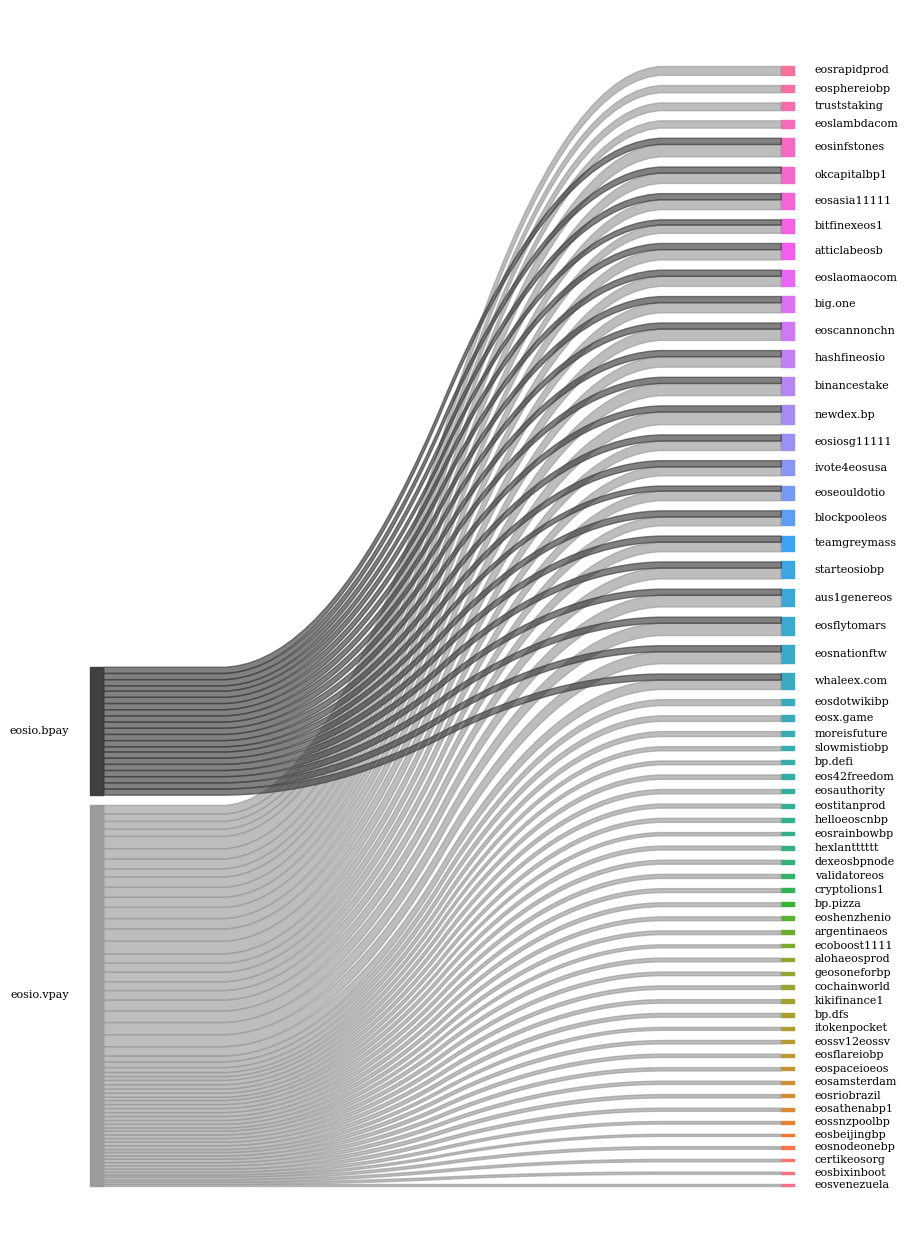

In [7]:
weight = df['amount'].astype(float)
ax = sankey(
    left=df['from'],
    right=df['to'],
    rightWeight=weight,
    leftWeight=weight,
    aspect=2,
    fontsize=8,
    figSize=(10, 16),
    colorDict=left_colors | right_colors
)